# Линейная регрессия. Работа с признаками

## Описание задачи и загрузка данных

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [41]:
data = pd.read_csv('https://raw.githubusercontent.com/evgpat/edu_stepik_practical_ml/main/datasets/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Посмотрим на типы столбцов.

In [42]:
data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

## Построение модели

### Задание 1

Есть ли в наборе данных пропущенные значения? Если да, удалите их.

Также выведите на экран число пропусков в каждом столбце.

In [43]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

### Задача 2

Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)?  
Если да, то удалите их.

In [44]:
data = data.drop(columns=['Unnamed: 0'])

### Задание 3

Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются корреляции между признаками.  
Выведите матрицу корреляций между всеми вещественными признаками и целевой переменной.

Какой вещественный признак коррелирует с целевой переменной больше всего?

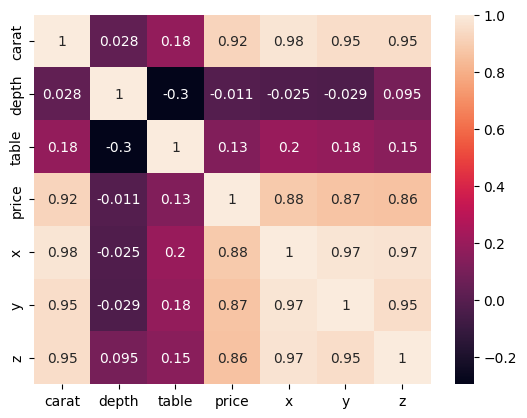

In [45]:
corr = data.corr(numeric_only=True)
ax = sns.heatmap(corr, annot=True)

### Задание 4

Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования ([`pd.get_dummies`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)). Не забудьте поставить значение параметра `drop_first` равным `True`.

Сколько получилось столбцов в таблице `data`?

*P.S. Числовые столбцы оставляем в таблице без изменений.*

In [46]:
pd.get_dummies(data, prefix=['cut', 'color', 'clarity'], drop_first=True)

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,0.21,59.8,61.0,326,3.89,3.84,2.31,False,False,True,...,False,False,False,False,True,False,False,False,False,False
2,0.23,56.9,65.0,327,4.05,4.07,2.31,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,0.29,62.4,58.0,334,4.20,4.23,2.63,False,False,True,...,False,True,False,False,False,False,False,True,False,False
4,0.31,63.3,58.0,335,4.34,4.35,2.75,True,False,False,...,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,False,True,False,...,False,False,False,False,True,False,False,False,False,False
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,True,False,False,...,False,False,False,False,True,False,False,False,False,False
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,False,False,False,...,False,False,False,False,True,False,False,False,False,False
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,False,False,True,...,True,False,False,False,False,True,False,False,False,False


### Задание 5

Создайте матрицу `X`, содержащую все признаки, и не содержащую целевую переменную `price`. Также создайте вектор `y`, содержащий целевую переменную `price`.

In [47]:
y = data['price']
X = data.drop(columns=['price', 'cut', 'color', 'clarity'])

Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной `0.3`.

При разбиении укажите `random_state = 42`.

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Задание 6

Зачастую при использовании линейных моделей вещественные признаки масштабируются.  В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

*  Обучите (`fit`) scaler на тренировочных данных
*  Преобразуйте (`transform`) и трейн, и тест

После применения масштабирования матрица перестает быть объектом `pandas.DataFrame` - решите эту проблему.

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
Xtrain_scaler = scaler.transform(X_train)
Xtest_scaler = scaler.transform(X_test)

### Задание 7

Обучите линейную регрессию на тренировочной выборке. Выведите *r2-score* на тренировочной и тестовой выборках.

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()

model.fit(Xtrain_scaler, y_train)

LinearRegression()

In [51]:
predict_train = model.predict(Xtrain_scaler)
predict_test = model.predict(Xtest_scaler)

In [52]:
train_r2 = r2_score(y_train, predict_train)
test_r2 = r2_score(y_test, predict_test)
print(train_r2, test_r2)

0.8590151413333513 0.8596405516349368


### Задание 8

Выведите на экран веса, которые линейная регрессия присвоила признакам.

Какой признак имеет наибольший отрицательный вес? (наибольший по модулю среди всех отрицательных весов)

In [53]:
features = X_train.columns
weights = model.coef_
feature_weights = pd.DataFrame({'Feature': features, 'Weight': weights})
feature_weights

,Feature,Weight
0,carat,5039.256344
1,depth,-285.981848
2,table,-230.384008
3,x,-1396.664364
4,y,37.086266
5,z,32.109139


## Попытка улучшить качество модели

Данная часть является творческой, и задания в ней немного сложнее, чем предыдущие.

Следующие вопросы не проверяются тестами.

### Задание 9

Как можно заметить из анализа корреляционной матрицы в задании 3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче, также свидетельствуют об этом. Для решения этой проблемы можно либо исключить некоторые признаки из модели (например, если признак линейно зависим с какими-то другими, его можно исключить из модели, т.е. удалить из матрицы объект-признак и заново обучить модель).

Удалите из матриц `Xtrain` и `Xtest` признак, который наиболее сильно коррелирует с остальными. Заново обучите модель и оцените её качество. Улучшилось ли качество модели?

Попробуйте удалить какой-то другой признак (можете попробовать несколько вариантов). Помогло ли это улучшить качество модели?

In [54]:
X_new = X.drop(columns=['carat'])
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y, test_size=0.3, random_state=42)

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_new)
Xtrain_scaler_new = scaler.transform(X_train_new)
Xtest_scaler_new = scaler.transform(X_test_new)

In [56]:
model_new = LinearRegression()

model_new.fit(Xtrain_scaler_new, y_train_new)

LinearRegression()

In [57]:
predict_train_new = model_new.predict(Xtrain_scaler_new)
predict_test_new = model_new.predict(Xtest_scaler_new)

In [58]:
train_r2_new = r2_score(y_train_new, predict_train_new)
test_r2_new = r2_score(y_test_new, predict_test_new)
print(train_r2_new, test_r2_new)

0.7854657904097194 0.7823604328175329


In [59]:
features = X_new.columns
weights = model_new.coef_
feature_weights = pd.DataFrame({'Feature': features, 'Weight': weights})
feature_weights

,Feature,Weight
0,depth,-6.193079
1,table,-196.911999
2,x,3313.979886
3,y,213.596980
4,z,63.422522


### Задание 10

Иногда генерация новых признаков помогает модели лучше находить взаимосвязи между целевой переменной и признаками. Попробуйте придумать новые признаки и добавить их в модель.  

Помогло ли это улучшить качество модели?

In [60]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree = 2)

pf.fit(Xtrain_scaler_new)

Xtrain_scaler_new = pf.transform(Xtrain_scaler_new)
Xtest_scaler_new = pf.transform(Xtest_scaler_new)

In [61]:
model_new = LinearRegression()

model_new.fit(Xtrain_scaler_new, y_train_new)

LinearRegression()

In [62]:
predict_train_new = model_new.predict(Xtrain_scaler_new)
predict_test_new = model_new.predict(Xtest_scaler_new)

In [63]:
train_r2_new = r2_score(y_train_new, predict_train_new)
test_r2_new = r2_score(y_test_new, predict_test_new)
print(train_r2_new, test_r2_new)

0.8689112083108672 0.8696109011430909


In [64]:
features = pf.get_feature_names_out(X_new.columns)
weights = model_new.coef_
feature_weights = pd.DataFrame({'Feature': features, 'Weight': weights})
feature_weights

,Feature,Weight
0,1,0.000000
1,depth,67.161013
2,table,-93.041029
3,x,-782.064780
4,y,4347.552969
5,z,-237.638899
6,depth^2,-5.292913
7,depth table,-12.140923
8,depth x,941.089986
9,depth y,-452.157557
